# ANALISI DATI sul Report dell'epidamia del virus COVID-19
Il database analizzato di seguito è stato curato da *Our World in Data* e caricato in un repository di **GitHub**.
Il file è stato caricato in tre formati. Ai fini dell'analisi, è stato selezionato il dataset in formato CSV.

## Importazione del Database

In [6]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
# Importazione del database sul Covid

dbcovid = pd.read_csv("owid-covid-data.csv")
dbcovid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,0.0,5740.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539,NaN,NaN,NaN,NaN


## 1. EDA

In [17]:
# Si richiede di verificare le dimensioni del dataset e i relativi metadati

print(dbcovid.shape)            # 429.435 righe e 67 colonne
print(dbcovid.info())

(429435, 67)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-nu

Sono presenti 429435 righe e 67 colonne.  
Nella visualizzazione si osserva che il type di 'date' è object, è necessario trasformarlo in un type data (datetime64 di NumPy).

In [21]:
dbcovid["date"] = pd.to_datetime(dbcovid["date"])
dbcovid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [24]:
dbcovid["date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 429435 entries, 0 to 429434
Series name: date
Non-Null Count   Dtype         
--------------   -----         
429435 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.3 MB


In [30]:
print("\nSi ricordi che sono presenti 429.435 righe. Sono presenti dei valori nulli per alcune colonne:")
dbcovid.isna().sum()  


Si ricordi che sono presenti 429.435 righe. Sono presenti dei valori nulli per alcune colonne:


iso_code                                        0
continent                                   26525
location                                        0
date                                            0
total_cases                                 17631
                                            ...  
population                                      0
excess_mortality_cumulative_absolute       416024
excess_mortality_cumulative                416024
excess_mortality                           416024
excess_mortality_cumulative_per_million    416024
Length: 67, dtype: int64

In [33]:
# Print delle colonne con i valori nulli e percentuale rispetto alle righe totali del database.

nulli_elevati = {}

for column in dbcovid.columns:                                                      
    sum_valori_nulli = dbcovid[column].isna().sum()                                 
    percentage_valori_nulli = round((sum_valori_nulli/dbcovid.shape[0])*100, 2)
    print(f"La colonna {column} contiene: {sum_valori_nulli} valori nulli, ovvero il {percentage_valori_nulli}% di tutte le righe")
    if percentage_valori_nulli > 50:
        nulli_elevati[column] = percentage_valori_nulli

print( "\n\nDi seguito dizionario con le colonne che contengono una percentuale di nulli maggiore del 50%:\n\n", nulli_elevati )

La colonna iso_code contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna continent contiene: 26525 valori nulli, ovvero il 6.18% di tutte le righe
La colonna location contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna date contiene: 0 valori nulli, ovvero il 0.0% di tutte le righe
La colonna total_cases contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_cases contiene: 19276 valori nulli, ovvero il 4.49% di tutte le righe
La colonna new_cases_smoothed contiene: 20506 valori nulli, ovvero il 4.78% di tutte le righe
La colonna total_deaths contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_deaths contiene: 18827 valori nulli, ovvero il 4.38% di tutte le righe
La colonna new_deaths_smoothed contiene: 20057 valori nulli, ovvero il 4.67% di tutte le righe
La colonna total_cases_per_million contiene: 17631 valori nulli, ovvero il 4.11% di tutte le righe
La colonna new_cases_per_million contiene: 19276

In [36]:
print("Rispetto all'intero dataframe:")
print( f"La % dei valori nulli dei pazienti in terapia intensiva è del: {nulli_elevati["icu_patients"]}%" )
print( f"La % dei valori nulli dei pazienti ospedalizzati è del: {nulli_elevati["hosp_patients"]}%" )

Rispetto all'intero dataframe:
La % dei valori nulli dei pazienti in terapia intensiva è del: 90.89%
La % dei valori nulli dei pazienti ospedalizzati è del: 90.53%


Si nota già dalle analisi preliminari che i valori nulli sono molto elevati per le successive analisi e considerazioni.

In [46]:
print("Descrizione del database dei dati numerici")
dbcovid.describe()

Descrizione del database dei dati numerici


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,429435,4.118040e+05,4.101590e+05,4.089290e+05,4.118040e+05,410608.000000,409378.000000,411804.000000,410159.000000,408929.000000,...,243817.000000,161741.000000,290689.000000,390299.000000,319127.000000,4.294350e+05,1.341100e+04,13411.000000,13411.000000,13411.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,8.041026e+03,8.125957e+04,71.852139,72.060873,112096.199396,122.357074,122.713844,...,33.097723,50.649264,3.106912,73.702098,0.722139,1.520336e+08,5.604765e+04,9.766431,10.925353,1772.666400
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,1.188000,0.100000,53.280000,0.394000,4.700000e+01,-3.772610e+04,-44.230000,-95.920000,-2936.453100
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,0.000000e+00,4.300000e+01,0.000000,0.000000,1916.100500,0.000000,0.000000,...,22.600000,20.859000,1.300000,69.500000,0.602000,5.237980e+05,1.765000e+02,2.060000,-1.500000,116.872242
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,1.200000e+01,7.990000e+02,0.000000,0.000000,29145.475000,0.000000,2.794000,...,33.100000,49.542000,2.500000,75.050000,0.740000,6.336393e+06,6.815199e+03,8.130000,5.660000,1270.801400
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,3.132860e+02,9.574000e+03,0.000000,3.143000,156770.190000,0.000000,56.253000,...,41.500000,82.502000,4.210000,79.460000,0.829000,3.296952e+07,3.912804e+04,15.160000,15.575000,2883.024150
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,6.319461e+06,7.057132e+06,103719.000000,14817.000000,763598.600000,241758.230000,34536.890000,...,78.100000,100.000000,13.800000,86.750000,0.957000,7.975105e+09,1.349776e+06,78.080000,378.220000,10293.515000
std,NaN,4.477582e+07,2.296649e+05,8.661611e+04,4.411901e+05,1368.322990,513.636567,162240.412419,1508.778583,559.701638,...,13.853948,31.905375,2.549205,7.387914,0.148903,6.975408e+08,1.568691e+05,12.040658,24.560706,1991.892769


In [49]:
# Il metodo .describe funziona solo con i dati 'int', per i dati 'object' (categorici) conviene eseguire una iterazione attraverso un ciclo for.

print("Le colonne che contengono dati categorici sono 4:\n")

for column in dbcovid.columns:
    if dbcovid[column].dtype == "object":
       unique_count = dbcovid[column].nunique()
       print(f"La colonna {column} contiene {unique_count} valori univoci:")
       all_count = dbcovid[column].value_counts()
       print(all_count)
       print()

Le colonne che contengono dati categorici sono 4:

La colonna iso_code contiene 255 valori univoci:
iso_code
OWID_HIC    3026
OWID_EUN    3024
OWID_UMC    3013
OWID_LMC    2983
OWID_LIC    2724
            ... 
OWID_SCT    1305
OWID_WLS    1198
MAC          795
OWID_CYN     691
ESH            1
Name: count, Length: 255, dtype: int64

La colonna continent contiene 6 valori univoci:
continent
Africa           95419
Europe           91031
Asia             84199
North America    68638
Oceania          40183
South America    23440
Name: count, dtype: int64

La colonna location contiene 255 valori univoci:
location
High-income countries            3026
European Union (27)              3024
Upper-middle-income countries    3013
Lower-middle-income countries    2983
Low-income countries             2724
                                 ... 
Scotland                         1305
Wales                            1198
Macao                             795
Northern Cyprus                   691
Wes

Per una decisione operativa:

In [54]:
# Si crea un databse in cui si mantengo solo le colonne richieste per l'analisi.

df_covid = dbcovid.loc[:, ["iso_code", "continent", "location", "date", "total_cases", "new_cases", "icu_patients", "hosp_patients"]]      # lista in quanto volgio la visualizzazione di più colonne.
print("Nuovo dataframe con le colonne di interesse per le successive analisi.")
display(df_covid)

Nuovo dataframe con le colonne di interesse per le successive analisi.


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
429430,ZWE,Africa,Zimbabwe,2024-07-31,266386.0,0.0,NaN,NaN
429431,ZWE,Africa,Zimbabwe,2024-08-01,266386.0,0.0,NaN,NaN
429432,ZWE,Africa,Zimbabwe,2024-08-02,266386.0,0.0,NaN,NaN
429433,ZWE,Africa,Zimbabwe,2024-08-03,266386.0,0.0,NaN,NaN


In [57]:
# Rifaccio una visualizzazione generale con solo le colonne interessate.

print("Descrizione del database dei dati numerici")
df_covid.describe()

Descrizione del database dei dati numerici


,date,total_cases,new_cases,icu_patients,hosp_patients
count,429435,4.118040e+05,4.101590e+05,39116.000000,40656.000000
mean,2022-04-21 01:06:25.463691008,7.365292e+06,8.017360e+03,660.971418,3911.741563
min,2020-01-01 00:00:00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,2021-03-05 00:00:00,6.280750e+03,0.000000e+00,21.000000,186.000000
50%,2022-04-20 00:00:00,6.365300e+04,0.000000e+00,90.000000,776.000000
75%,2023-06-08 00:00:00,7.582720e+05,0.000000e+00,413.000000,3051.000000
max,2024-08-14 00:00:00,7.758668e+08,4.423623e+07,28891.000000,154497.000000
std,NaN,4.477582e+07,2.296649e+05,2139.615532,9845.750485


Correlazione tra i dati numerici interessati per l'analisi attuale:



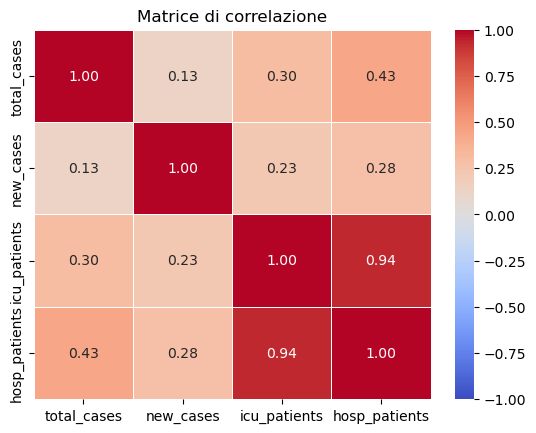

In [66]:
# Si esegue un'analisi di correlazione sui valori numerici. 


matr_correlaz = df_covid.corr(numeric_only = True)
print("Correlazione tra i dati numerici interessati per l'analisi attuale:\n")
sns.heatmap( matr_correlaz, annot = True, cmap = "coolwarm", linewidths = 0.5, fmt = ".2f", vmin=-1, vmax=1 )
plt.title("Matrice di correlazione")
plt.show()

Dall'analisi effettuata emerge una bassa correlazione tra le variabili esaminate, suggerendo che queste non si influenzino reciprocamente, fatta eccezione per i pazienti in terapia intensiva, che risultano inevitabilmente inclusi anche nel conteggio degli ospedalizzati. 
Sebbene si osservi una possibile influenza dei pazienti ospedalizzati sull’andamento dei nuovi casi, è importante considerare che l’elevata percentuale di valori nulli nelle categorie 'ospedalizzati' e 'terapia intensiva' potrebbe inficiare l’affidabilità di tale relazione. Pertanto, tali risultati andrebbero interpretati con cautela, tenendo conto delle limitazioni del dataset.
Si conferma che alla fine delle analisi, si è osservato un possibile errore di registrazione per 'icu_patients'.


In quanto c'è poca relazione tra i 'total_cases' e i 'new_cases', si vuole eseguire un controllo delle registrazioni settimanali. Nelle nuova matrice si osserva una differenza sulla correlazione. 

Non si andranno ad eliminare le righe in cui 'new_cases' sono a zero, perché potrebbe capitare che, effettivamente, alle volte non ci sono stati nuovi casi.


<Axes: >

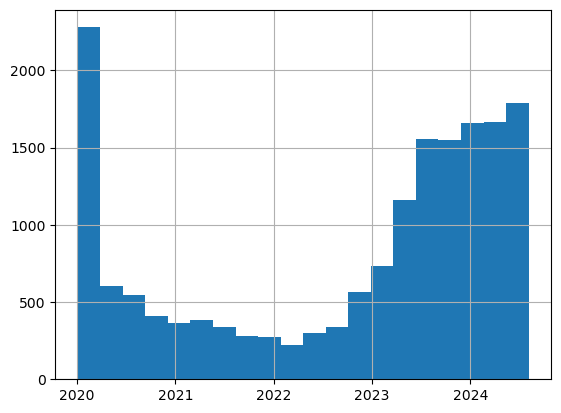

In [71]:
df_covid_per_controllo_correlaz = df_covid.loc[(df_covid["date"].dt.dayofweek == 6)]
df_covid_per_controllo_correlaz["date"].loc[df_covid_per_controllo_correlaz.new_cases == 0].hist(bins=20)

Si può notare che si distribuiscono nelle fasi iniziali della pandemia, e poi negli anni più recenti, mentre capitava di rado negli anni 2020-21-22, come prevedibile. 

In [76]:
print("I continenti in cui i 'new_cases' appaiono a zero, sono:")
df_covid_per_controllo_correlaz.loc[df_covid_per_controllo_correlaz.new_cases == 0].groupby("continent").size()

I continenti in cui i 'new_cases' appaiono a zero, sono:


continent
Africa           4141
Asia             3001
Europe           1922
North America    3351
Oceania          3687
South America     876
dtype: int64

Si può vedere che per la maggiore appaiono dove c'è stato un controllo meno stringente.

Correlazione tra i dati numerici interessati per l'analisi attuale:



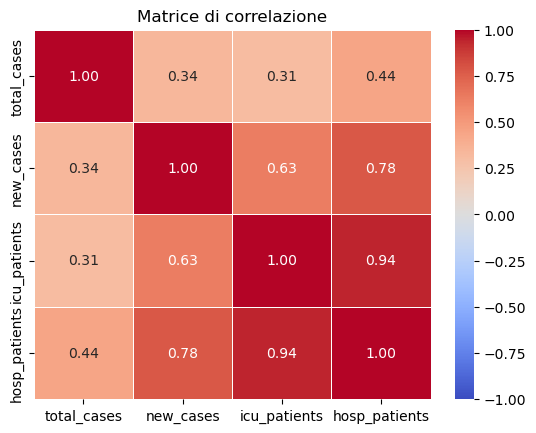

In [81]:
matr_correlaz_b = df_covid_per_controllo_correlaz.corr(numeric_only = True)
print("Correlazione tra i dati numerici interessati per l'analisi attuale:\n")
sns.heatmap( matr_correlaz_b, annot = True, cmap = "coolwarm", linewidths = 0.5, fmt = ".2f", vmin=-1, vmax=1 )
plt.title("Matrice di correlazione")
plt.show()

Da questa seconda analisi si osserva che 'new_cases' e 'hosp_patientes' hanno una correlazione diretta.
All'aumentare dei nuovi casi, aumentano gli ospedalizzati. Come si vedrà successivamente si può osservare dal grafico che la tendenza è differente, ciò significa che potrebbero esserci fattori esterni che influenzano l'andamento dei casi.
Più leve è l'aumento dei pazienti ricoverati in terapia intensiva rispetto all'aumento dei nuovi casi con una correlazione dello 0,63. 

Questo può significare che inevitabilmente nel momento in cui si iniziano a verificare delle tendenze in aumento e di correlazione, sia necessario: pianificare risorse sanitarie
e lo studio di misure preventive per ridurre le ospedalizzazioni e limitare la proliferazione del virus.

Correlazione degli ospedalizzati rispetto ai nuovi casi Covid


<Axes: xlabel='new_cases', ylabel='hosp_patients'>

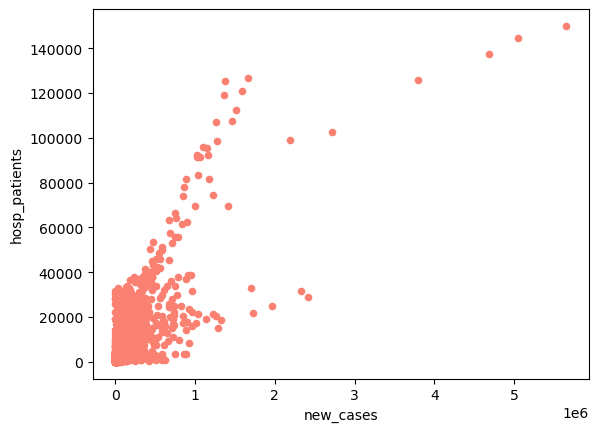

In [84]:
print("Correlazione degli ospedalizzati rispetto ai nuovi casi Covid")
df_covid_per_controllo_correlaz.plot(kind = "scatter", x = "new_cases", y = "hosp_patients", color = "Salmon")

1e6 è la notazione scientifica di 'milioni'. Da qui si possono notare gli 'outlier' (casi distanti dalla tendenza). Può significare che nei periodi in cui si è verificato un elevato aumento dei nuovi casi, possa aver conseguentemente causato picchi di ospedalizzazioni; questa analisi potrebbe combaciare alle ondate del virus. Effettivamnete nei prossimi capitoli si possono osservare alcune 'ondate epidemiche' del virus attraverso il filtro del dataframe per periodi e paesi per una analisi più mirata.

(0.0, 18305.299999999967)

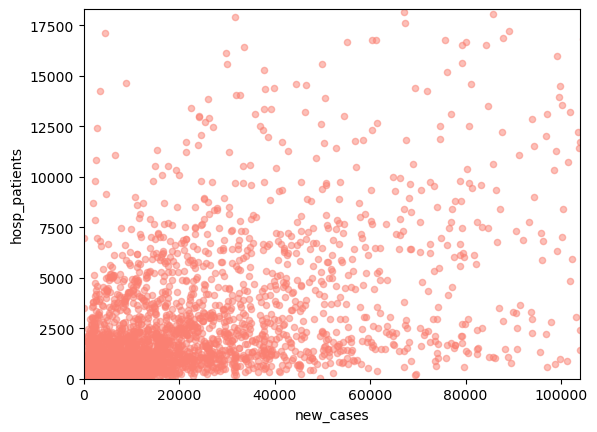

In [94]:
# Una osservazione più dettaglaita escludendo i valori estremi delle due assi.
ax = df_covid_per_controllo_correlaz.plot(kind = "scatter", x = "new_cases", y = "hosp_patients", color = "Salmon", alpha = 0.5)
ax.set_xlim(left = 0, right = df_covid_per_controllo_correlaz["new_cases"].quantile(0.95)) 
ax.set_ylim(bottom = 0, top = df_covid_per_controllo_correlaz["hosp_patients"].quantile(0.95))   



Correlazione degli ospedalizzati in terapia intensiva rispetto agli ospedalizzati


<Axes: xlabel='hosp_patients', ylabel='icu_patients'>

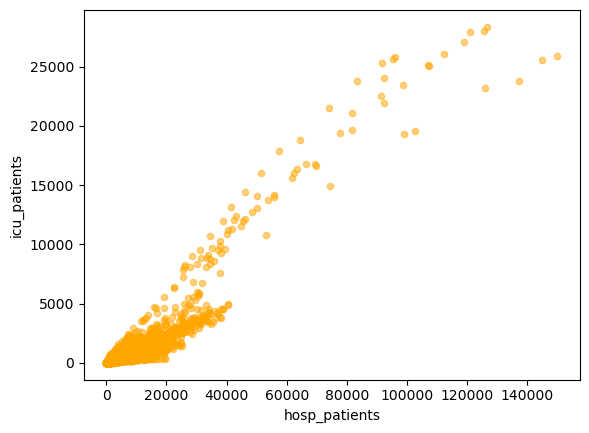

In [96]:
print("\nCorrelazione degli ospedalizzati in terapia intensiva rispetto agli ospedalizzati")
df_covid_per_controllo_correlaz.plot(kind = "scatter", x = "hosp_patients", y = "icu_patients", color = "Orange", alpha = 0.5)


Nel caso degli ospedalizzati e i pazienti in terapia intensiva, si può osservare la loro alta correlazione diretta; la concentrazione dei casi in terapia intensiva è relativamente bassa, i casi con un alto numero di ospedalizzati sono meno frequenti (si riesce ad intuire la minor densità dei casi con l'aiuto del punti più chiari).

## 2. Si chiede di trovare, per ogni continente

a. Il numero di casi fin dall'inizio della pandemia.  
b. La percentuale rispetto al totale mondiale del numero di casi.

In [104]:
# Per l'analisi richiesta, eseguo un'osservazione sulla modalità di caricamento di 'new_cases' e 'total_cases'.

continente_asia = df_covid["continent"] == "Asia"
nuoviCasi_asia = df_covid["new_cases"] > 0
filtro = continente_asia & nuoviCasi_asia
display( df_covid.loc[filtro] )                         # per il calcolo dei casi, si userà 'new_cases'

display(df_covid.loc[df_covid.duplicated(subset = ["location", "date"], keep = False)])


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
56,AFG,Asia,Afghanistan,2020-03-01,1.0,1.0,NaN,NaN
70,AFG,Asia,Afghanistan,2020-03-15,7.0,6.0,NaN,NaN
77,AFG,Asia,Afghanistan,2020-03-22,24.0,17.0,NaN,NaN
84,AFG,Asia,Afghanistan,2020-03-29,91.0,67.0,NaN,NaN
91,AFG,Asia,Afghanistan,2020-04-05,274.0,183.0,NaN,NaN
...,...,...,...,...,...,...,...,...
425386,YEM,Asia,Yemen,2022-09-04,11926.0,1.0,NaN,NaN
425393,YEM,Asia,Yemen,2022-09-11,11932.0,6.0,NaN,NaN
425407,YEM,Asia,Yemen,2022-09-25,11935.0,3.0,NaN,NaN
425421,YEM,Asia,Yemen,2022-10-09,11939.0,4.0,NaN,NaN


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
102540,TLS,Asia,East Timor,2021-02-12,80.0,0.0,NaN,NaN
102541,TLS,Asia,East Timor,2021-02-13,80.0,0.0,NaN,NaN
102542,TLS,Asia,East Timor,2021-02-14,102.0,22.0,NaN,NaN
102543,TLS,Asia,East Timor,2021-02-15,102.0,0.0,NaN,NaN
102544,TLS,Asia,East Timor,2021-02-16,102.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
409807,OWID_UMC,NaN,Upper-middle-income countries,2024-07-31,251739241.0,0.0,NaN,NaN
409808,OWID_UMC,NaN,Upper-middle-income countries,2024-08-01,251739241.0,0.0,NaN,NaN
409809,OWID_UMC,NaN,Upper-middle-income countries,2024-08-02,251739241.0,0.0,NaN,NaN
409810,OWID_UMC,NaN,Upper-middle-income countries,2024-08-03,251739241.0,0.0,NaN,NaN


Attraverso un controllo dei 'total_cases' e 'new_cases', si osserva che c'è una differenza di: 68.274 (sono maggiori i 'new_cases').
Come indicato nel repository da dove è stato scaricato il databse CSV, si legge che esiste una discrepanza tra i due campi citati precedentemente, dovuto ad alcune modifiche necessarie per sistemare i dati in eccedenza (per i presunti casi e i decessi) durante la registrazione dei dati.
Nonostante questa osservazione, tale differenza incide poco sulla somma totale, come si potrà vedere nelle prossime analisi, nello specifico nel capitolo " Controllo di verifica con il 'total_cases' ".

Per la risposta del punto a. si terrà in considerazione 'new_cases' i quali hanno avuto una registrazione settimanale.

In [109]:
# Prima di procedere, per una scelta operativa, si ordina in modo cronologico il DataFrame.

df_covid_cron = df_covid.sort_values( by = ["continent", "location", "date"] )

# Si verifica se esistono dei nulli impiciti in 'new_cases'

nulli_impliciti_new_cases = df_covid_cron["new_cases"] == ""    
print(f"Esistono dei nulli impiciti in 'new_cases'?\n{nulli_impliciti_new_cases.value_counts()}")

Esistono dei nulli impiciti in 'new_cases'?
new_cases
False    429435
Name: count, dtype: int64


In [112]:
# a. Il numero di casi fin dall'inizio della pandemia 

# I 'total_cases' include i casi probabili che sono stati segnalati.

new_cases_continenti = df_covid_cron.groupby("continent")["new_cases"].sum()      # somma tutti i nuovi casi di ogni settimana. Le location includono zone del mondo, ma nel raggruppamento raggruppa per i continenti (valori univoci).  
print(f"Il numero di casi per continente è:\n{new_cases_continenti}")

somma_new_cases_continente = df_covid_cron.groupby("continent")["new_cases"].sum().sum()     # si dovrebbe ottenere l'ultimo valore di 'total_cases'
print(f"\nIl numero dei casi totali è: {somma_new_cases_continente}")

Il numero di casi per continente è:
continent
Africa            13146831.0
Asia             301564180.0
Europe           252916868.0
North America    124492698.0
Oceania           15003468.0
South America     68811012.0
Name: new_cases, dtype: float64

Il numero dei casi totali è: 775935057.0


In [115]:
# b. La percentuale rispetto al totale mondiale del numero di casi

print("\nDi seguito la percentuale di casi per continente rispetto al totale mondiale.\n")

for continente in new_cases_continenti:
    continente_percentage = round((continente/somma_new_cases_continente)*100, 2)    
    print( f"Il continente {continente} è del {continente_percentage}%  " )


Di seguito la percentuale di casi per continente rispetto al totale mondiale.

Il continente 13146831.0 è del 1.69%  
Il continente 301564180.0 è del 38.86%  
Il continente 252916868.0 è del 32.6%  
Il continente 124492698.0 è del 16.04%  
Il continente 15003468.0 è del 1.93%  
Il continente 68811012.0 è del 8.87%  


## Controllo di verifica con il 'total_cases'

In [120]:

df_covid_ord_data = df_covid.sort_values(by="date")

# Si controlla se sono preseti delle strighe vuote implicite in "total_cases" 

nulli_impliciti = df_covid_ord_data["total_cases"] == ""    
print(f"Ci sono dei nulli impliciti?\n  {nulli_impliciti.value_counts()}")

# FILTRO i 'total_cases' per i non nulli e si prende per ogni location l'ultimo valore (alla fine delle registrazioni sui casi covid).
df_valori_finali_location = df_covid_ord_data.loc[df_covid_ord_data["total_cases"].notna()].groupby("location").tail(1)        #Nel calcolo verranno esclusi automaticamente gli NA in Continent (non interessano nel calcolo in quanto zone del mondo e dati aggregati).
print("\n", df_valori_finali_location.shape)

print("\nRaggruppamento per location all'ultima data di registrazione")
display(df_valori_finali_location[["continent", "location", "date", "total_cases"]])



Ci sono dei nulli impliciti?
  total_cases
False    429435
Name: count, dtype: int64

 (246, 8)

Raggruppamento per location all'ultima data di registrazione


,continent,location,date,total_cases
257089,Africa,Morocco,2024-08-04,1279115.0
150454,North America,Grenada,2024-08-04,19693.0
314408,Africa,Reunion,2024-08-04,494595.0
245371,North America,Mexico,2024-08-04,7619458.0
260437,Asia,Myanmar,2024-08-04,642885.0
...,...,...,...,...
350867,Europe,Slovakia,2024-08-04,1878002.0
113538,Africa,Eritrea,2024-08-04,10189.0
357563,Africa,South Africa,2024-08-04,4072765.0
102135,North America,Dominican Republic,2024-08-04,661103.0


In [123]:
# Raggruppamento per continente con la somma degli ultimi valori delle location.

raggrupp_total_cases = df_valori_finali_location.groupby("continent")["total_cases"].sum()

print( f"\nRaggruppamento per continente all'ultima data di registrazione (04-08-2024)\n    {raggrupp_total_cases}" )


sum_raggrupp_total_cases = df_valori_finali_location.groupby("continent")["total_cases"].sum().sum()
print("\nLa somma finale di total_cases è:", sum_raggrupp_total_cases)


Raggruppamento per continente all'ultima data di registrazione (04-08-2024)
    continent
Africa            13145380.0
Asia             301499099.0
Europe           252916868.0
North America    124492666.0
Oceania           15003352.0
South America     68809418.0
Name: total_cases, dtype: float64

La somma finale di total_cases è: 775866783.0


In [126]:
# Differenza tra i 'new_cases' e i 'total_cases'.

differenza_total_new = new_cases_continenti - raggrupp_total_cases
print( f"La differenza tra i 'new_cases' e i 'total_cases' dei continenti è di:\n    {differenza_total_new}" )

print( f"\nLa differenza tra i due campi è di: {somma_new_cases_continente - sum_raggrupp_total_cases}")

La differenza tra i 'new_cases' e i 'total_cases' dei continenti è di:
    continent
Africa            1451.0
Asia             65081.0
Europe               0.0
North America       32.0
Oceania            116.0
South America     1594.0
dtype: float64

La differenza tra i due campi è di: 68274.0


In [129]:
percentage_rate = round((raggrupp_total_cases/new_cases_continenti)*100, 8)
print( f"Il rapporto percentuale tra le due colonne è:\n    {percentage_rate}" )    # visualizzo in percentuale la differenza


Il rapporto percentuale tra le due colonne è:
    continent
Africa            99.988963
Asia              99.978419
Europe           100.000000
North America     99.999974
Oceania           99.999227
South America     99.997684
dtype: float64


Nonostante i valori di total_cases siano inferiori, il rapporto percentuale calcolato rivela che la differenza è minima. In particolare, in Asia, il continente con la maggiore discrepanza apparente, i 'total_cases' rappresentano comunque il 99,984% dei new_cases, indicando un impatto marginale.

## 3. Selezionare i dati relativi all'Italia nel 2022 
Poiché i nuovi casi vengono registrati settimanalmente, filtrare via i giorni che non hanno misurazioni; quindi mostrare con dei grafici adeguati:  
- a. L'evoluzione del casi totali dall'inizio alla fine dell'anno.
  - b. Il numero di nuovi casi rispetto alla data 

Pulizia del database, si riprende dal dataframe 'df_covid_cron'

In [138]:
# Togliere i valori 'null' e gli 0 di 'new cases' 40.000 circa

db_not_valori_nulli = df_covid_cron.dropna(subset = "new_cases")
db_not_valori_nulli

db_not_zero = db_not_valori_nulli.loc[(db_not_valori_nulli["new_cases"] != 0) & (db_not_valori_nulli["date"].dt.dayofweek == 6)]  

print("\nDataframe pulito senza le zone del mondo, nonchè dove Continent == NaN")
db_not_zero = db_not_zero.dropna(subset = "continent")
display(db_not_zero)           # Nuovo dataframe pulito.

# Ulteriore verifica sulla presenza delle stringhe vuote implicite.

vuote_implicite = db_not_zero["new_cases"] == ""    
print( f"\nVerifico nuovamente l'esistenza dei nulli impliciti:\n    {vuote_implicite.value_counts()}" )



Dataframe pulito senza le zone del mondo, nonchè dove Continent == NaN


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
5078,DZA,Africa,Algeria,2020-03-01,1.0,1.0,NaN,NaN
5085,DZA,Africa,Algeria,2020-03-08,19.0,18.0,NaN,NaN
5092,DZA,Africa,Algeria,2020-03-15,37.0,18.0,NaN,NaN
5099,DZA,Africa,Algeria,2020-03-22,139.0,102.0,NaN,NaN
5106,DZA,Africa,Algeria,2020-03-29,454.0,315.0,NaN,NaN
...,...,...,...,...,...,...,...,...
417691,VEN,South America,Venezuela,2023-04-02,552398.0,101.0,NaN,NaN
417705,VEN,South America,Venezuela,2023-04-16,552429.0,31.0,NaN,NaN
417712,VEN,South America,Venezuela,2023-04-23,552555.0,126.0,NaN,NaN
417719,VEN,South America,Venezuela,2023-04-30,552578.0,23.0,NaN,NaN



Verifico nuovamente l'esistenza dei nulli impliciti:
    new_cases
False    38929
Name: count, dtype: int64



    Casi totali in Italia 2022


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
186003,ITA,Europe,Italy,2022-01-02,6267035.0,644604.0,1319.0,13075.0
186010,ITA,Europe,Italy,2022-01-09,7281297.0,1014262.0,1595.0,17242.0
186017,ITA,Europe,Italy,2022-01-16,8549450.0,1268153.0,1691.0,20410.0
186024,ITA,Europe,Italy,2022-01-23,9781191.0,1231741.0,1685.0,21312.0
186031,ITA,Europe,Italy,2022-01-30,10821375.0,1040184.0,1593.0,21210.0
186038,ITA,Europe,Italy,2022-02-06,11542793.0,721418.0,1431.0,19929.0
186045,ITA,Europe,Italy,2022-02-13,12053330.0,510537.0,1190.0,17250.0
186052,ITA,Europe,Italy,2022-02-20,12427773.0,374443.0,934.0,14218.0
186059,ITA,Europe,Italy,2022-02-27,12732680.0,304907.0,733.0,11601.0
186066,ITA,Europe,Italy,2022-03-06,12990223.0,257543.0,603.0,9431.0


(52, 8)


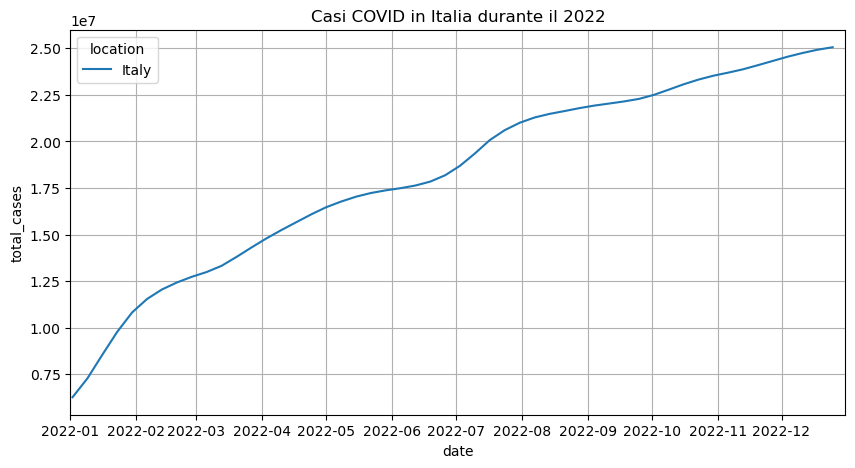

In [141]:
# a. Casi totali in Italia 2022:

df_italia_22 = db_not_zero.loc[(db_not_zero["location"] == "Italy") & (db_not_zero["date"].dt.year == 2022)]      # due masking per la condizione nella selezione.
print( f"\n    Casi totali in Italia 2022" )
display(df_italia_22)
print(df_italia_22.shape)

plt.figure(figsize = (10, 5))
sns.lineplot(data = df_italia_22, x = "date", y = "total_cases", hue = "location")
plt.title("Casi COVID in Italia durante il 2022")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])
plt.grid(True)
plt.show()


A fine 2022 in Italia, si è arrivati ad avere un totale di 25.060.503 casi da COVID.

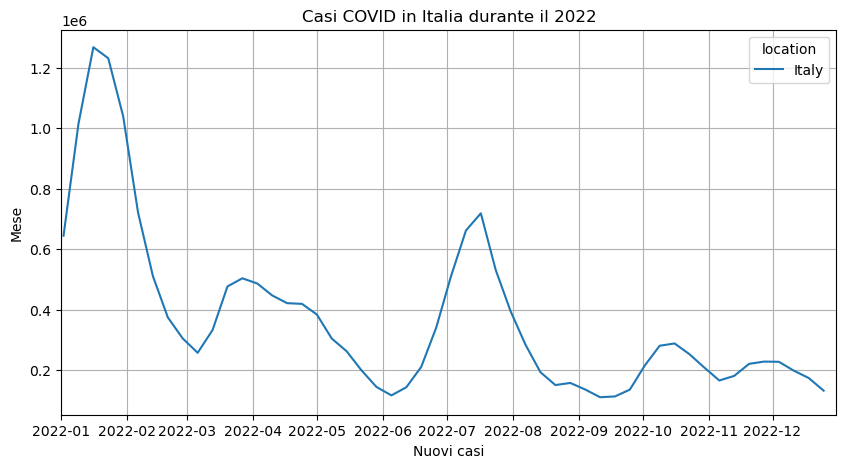

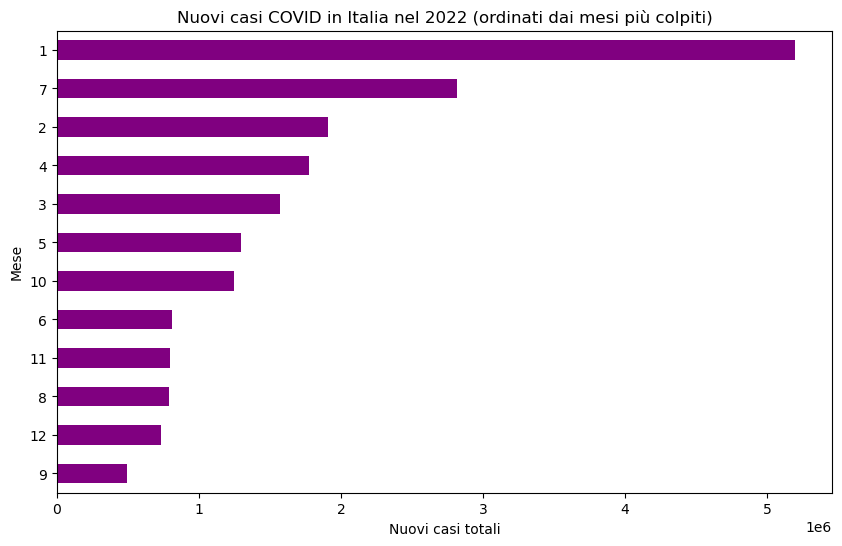

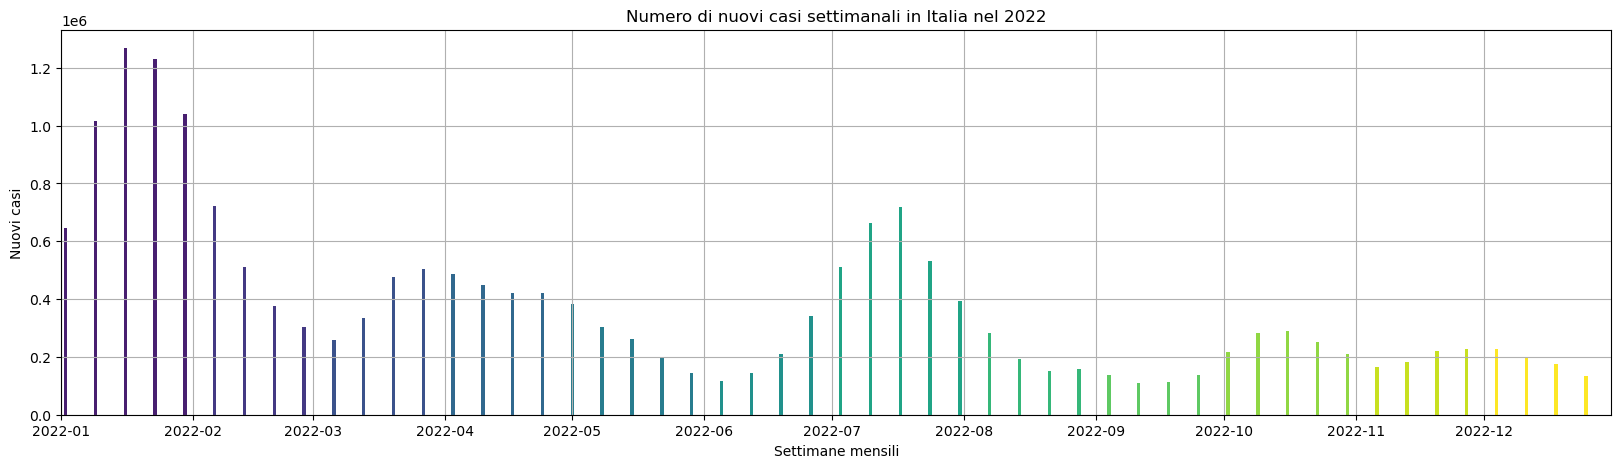

In [149]:
# b.

plt.figure(figsize = (10, 5))
sns.lineplot(data = df_italia_22, x = "date", y = "new_cases",  hue = "location")
plt.title("Casi COVID in Italia durante il 2022")
plt.xlabel("Nuovi casi")
plt.ylabel("Mese")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])
plt.grid(True)
plt.show()

plt.figure(figsize = (10, 6))
df_italia_22.groupby(df_italia_22["date"].dt.month)["new_cases"].sum().sort_values().plot(kind = "barh", color = "Purple")     # rimane un settaggio dell'index momentaneo per la creazione del grafico.
plt.title("Nuovi casi COVID in Italia nel 2022 (ordinati dai mesi più colpiti)")
plt.xlabel("Nuovi casi totali")
plt.ylabel("Mese")
plt.show()


mesi = df_italia_22["date"].dt.month
colori = plt.cm.viridis(mesi/12)

plt.figure(figsize = (20, 5))
plt.bar(df_italia_22["date"], df_italia_22["new_cases"], color = colori)
plt.title("Numero di nuovi casi settimanali in Italia nel 2022")
plt.xlabel("Settimane mensili")
plt.ylabel("Nuovi casi")
plt.xlim([pd.to_datetime("2022-01-01"), pd.to_datetime("2022-12-31")])
plt.grid()
plt.show()


Si può esservare immediatamente che durante l'anno 2022, il mese con maggiori casi in assoluto sia stato il mese di gennaio -con 1.268.153 new_cases- e a seguirsi il mese di luglio -con 718.925 new_cases-, periodo estivo nonchè di una maggior mobilità. Da una ricerca si è riscontrato che durante quel periodo si è manifestata con facilità la diffusione delle sottovarianti BA.4 e BA.5 di Omicron, più contagiose e in grado di eludere parzialmente l'immunità pregressa (da vaccino o infezione precedente).

## 4. Riguardo le nazioni di Italia, Germania e Francia

a. Mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit - ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso).  
b. Scrivere un breve commento (una o due righe) riguardo che conclusioni possiamo trarre osservando il grafico risultante.

In [155]:
# Filtro

df_ita_ger_fra = df_covid_cron.loc[(df_covid_cron["location"] == "Italy") | (df_covid_cron["location"] == "Germany") | (df_covid_cron["location"] == "France")]

df_icu = df_ita_ger_fra[(df_ita_ger_fra["date"] >= "2022-05-01") & (df_ita_ger_fra["date"] <= "2023-04-30")]
print( f"\n    Dataframe con filtro per paesi e periodo" )
display(df_icu)



    Dataframe con filtro per paesi e periodo


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,1557.0,23327.0
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,1511.0,23211.0
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,1498.0,22849.0
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,1465.0,22319.0
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,1447.0,21880.0
...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,100.0,3098.0
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,99.0,3079.0
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,105.0,3073.0
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,111.0,3045.0


In [158]:
print(f"\nSono presenti i NaN in 'icu_patients'?\n {df_icu["icu_patients"].isna().value_counts()}" )     # I NaN per questo periodo e per i tre paesi sono: 30
df_icu_senza_nulli = df_icu.dropna(subset = "icu_patients")
print(f"\n\n   Dataframe senza i NaN in 'icu_patients'\n")
display(df_icu_senza_nulli)

nulli_impliciti_icu = df_icu_senza_nulli["icu_patients"] == ""    
print(f"Ci sono valori nulli impliciti?\n  {nulli_impliciti_icu.value_counts()}")      # non sono presenti.

print(f"\nCi sono valori 0 in icu_patients?\n  {(df_icu_senza_nulli["icu_patients"] == 0).value_counts()}")      # non sono presenti.


Sono presenti i NaN in 'icu_patients'?
 icu_patients
False    1065
True       30
Name: count, dtype: int64


   Dataframe senza i NaN in 'icu_patients'



,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
131214,FRA,Europe,France,2022-05-01,27742592.0,376510.0,1557.0,23327.0
131215,FRA,Europe,France,2022-05-02,27742592.0,0.0,1511.0,23211.0
131216,FRA,Europe,France,2022-05-03,27742592.0,0.0,1498.0,22849.0
131217,FRA,Europe,France,2022-05-04,27742592.0,0.0,1465.0,22319.0
131218,FRA,Europe,France,2022-05-05,27742592.0,0.0,1447.0,21880.0
...,...,...,...,...,...,...,...,...
186482,ITA,Europe,Italy,2023-04-26,25772459.0,0.0,100.0,3098.0
186483,ITA,Europe,Italy,2023-04-27,25772459.0,0.0,99.0,3079.0
186484,ITA,Europe,Italy,2023-04-28,25772459.0,0.0,105.0,3073.0
186485,ITA,Europe,Italy,2023-04-29,25772459.0,0.0,111.0,3045.0


Ci sono valori nulli impliciti?
  icu_patients
False    1065
Name: count, dtype: int64

Ci sono valori 0 in icu_patients?
  icu_patients
False    1065
Name: count, dtype: int64


Text(0.5, 1.0, 'Distribuzione dei pazienti in terapia intensiva (ICU) in Francia, Germania e Italia (Maggio 2022 - Aprile 2023)\n')

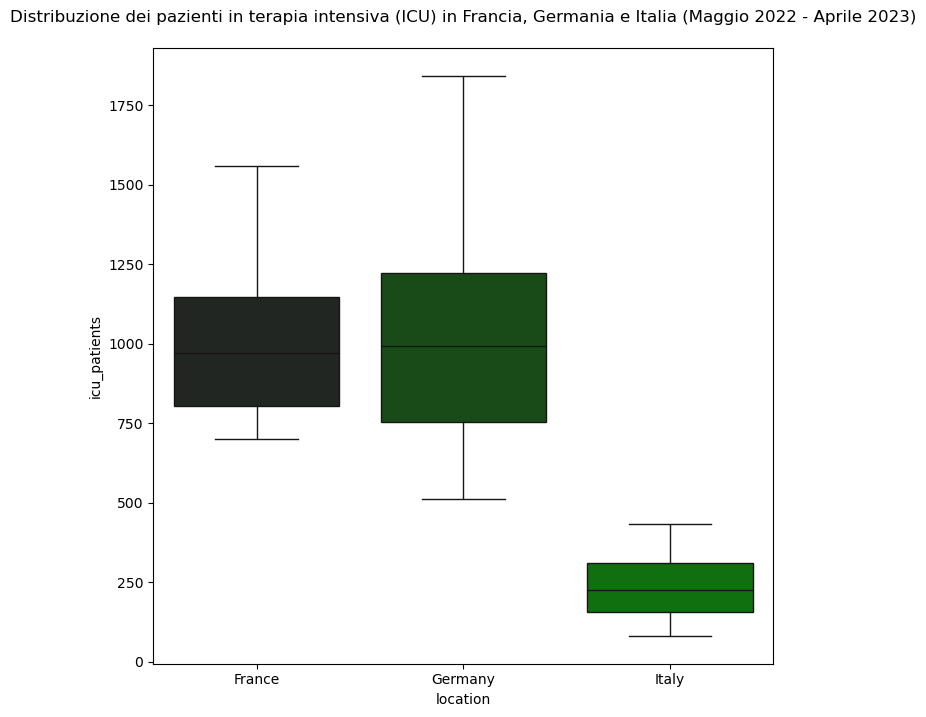

In [161]:
# a. 
print("\n")
plt.figure(figsize = [8,8])
sns.boxplot(data = df_icu_senza_nulli, x = "location", y = "icu_patients", hue = "location", palette = "dark:Green")
plt.title("Distribuzione dei pazienti in terapia intensiva (ICU) in Francia, Germania e Italia (Maggio 2022 - Aprile 2023)\n")

In [164]:
df_icu_senza_nulli.groupby("location")["icu_patients"].max()

location
France     1557.0
Germany    1842.0
Italy       434.0
Name: icu_patients, dtype: float64

In media si denota che la Germania ha presentato una mediana più elevata per i pazienti in terapia intensiva (ICU) nel periodo tra maggio 2022 e aprile 2023, oltre ad arrivare ad avere un picco di 1.842 pazienti ICU e un totale maggiore di casi.
Da questo grafico si dimostra che per lo stesso periodo, in Italia ci sono stati molto meno casi, con un massimo di 434 e una distribuzione per lo più compatta.  
Osservando i dati di Francia e Germania, si nota che la Germania ha registrato un picco significativamente più alto -1842 casi- rispetto alla Francia -1557 casi-. Nonostante questa differenza nei picchi, le mediane dei casi nei due Paesi risultano molto simili.

## 5. Riguardo le nazioni di Italia, Germania, Francia e Spagna in tutto il 2021

a. Mostrare, in maniera grafica oppure numerica, la somma dei pazienti ospitalizzati per ognuna (colonna hosp_patients).  
b. Se ci sono dati nulli, con un breve commento scrivere se può essere possibile gestirli tramite sostituzione o meno.

In [171]:
hosp_2021 = df_covid_cron.loc[(df_covid_cron["location"].isin(["Italy", "Germany", "France", "Spain"])) & (df_covid_cron["date"].dt.year == 2021)]
print(f"\n    Dataframe dei casi ospedalizzati con filtro dei paesi e per l'anno 2021 ")
display(hosp_2021)


    Dataframe dei casi ospedalizzati con filtro dei paesi e per l'anno 2021 


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
130729,FRA,Europe,France,2021-01-01,2338258.0,0.0,2609.0,24263.0
130730,FRA,Europe,France,2021-01-02,2338258.0,0.0,2632.0,24458.0
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,2665.0,24780.0
130732,FRA,Europe,France,2021-01-04,2427206.0,0.0,2657.0,24962.0
130733,FRA,Europe,France,2021-01-05,2427206.0,0.0,2616.0,24871.0
...,...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,6100138.0,0.0,1722.0,8024.0
363309,ESP,Europe,Spain,2021-12-28,6100138.0,0.0,1764.0,8580.0
363310,ESP,Europe,Spain,2021-12-29,6100138.0,0.0,1794.0,8916.0
363311,ESP,Europe,Spain,2021-12-30,6100138.0,0.0,1811.0,8982.0


In [174]:
print( f"Sono presenti alcuni valori NaN in 'icu_patients':\n{hosp_2021["hosp_patients"].isna().value_counts()}" )     # I NaN per questo periodo e per i quattro paesi sono: 365  
print( "\nSi visualizza il Continente e Location per gli 'hosp_patients' NaN:" )
display(hosp_2021.loc[hosp_2021["hosp_patients"].isna()])
print("Si raggruppano per 'location'")
display(hosp_2021.loc[hosp_2021["hosp_patients"].isna()].groupby("location")["hosp_patients"].sum()) 


Sono presenti alcuni valori NaN in 'icu_patients':
hosp_patients
False    1095
True      365
Name: count, dtype: int64

Si visualizza il Continente e Location per gli 'hosp_patients' NaN:


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
140773,DEU,Europe,Germany,2021-01-01,1660178.0,0.0,5604.0,NaN
140774,DEU,Europe,Germany,2021-01-02,1660178.0,0.0,5724.0,NaN
140775,DEU,Europe,Germany,2021-01-03,1783131.0,122953.0,5761.0,NaN
140776,DEU,Europe,Germany,2021-01-04,1783131.0,0.0,5744.0,NaN
140777,DEU,Europe,Germany,2021-01-05,1783131.0,0.0,5671.0,NaN
...,...,...,...,...,...,...,...,...
141133,DEU,Europe,Germany,2021-12-27,7014043.0,0.0,4206.0,NaN
141134,DEU,Europe,Germany,2021-12-28,7014043.0,0.0,4128.0,NaN
141135,DEU,Europe,Germany,2021-12-29,7014043.0,0.0,4004.0,NaN
141136,DEU,Europe,Germany,2021-12-30,7014043.0,0.0,3913.0,NaN


Si raggruppano per 'location'


location
Germany    0.0
Name: hosp_patients, dtype: float64

Si osserva che i valori NaN sono presenti solo per la Germania, dato che esiste il numero di 

In [179]:
print("\nDi seguito il dataframe senza i valori nulli espliciti in 'hosp_patients'.")
df_hosp_senza_nulli = hosp_2021.dropna(subset = "hosp_patients")
display(df_hosp_senza_nulli)



Di seguito il dataframe senza i valori nulli espliciti in 'hosp_patients'.


,iso_code,continent,location,date,total_cases,new_cases,icu_patients,hosp_patients
130729,FRA,Europe,France,2021-01-01,2338258.0,0.0,2609.0,24263.0
130730,FRA,Europe,France,2021-01-02,2338258.0,0.0,2632.0,24458.0
130731,FRA,Europe,France,2021-01-03,2427206.0,88948.0,2665.0,24780.0
130732,FRA,Europe,France,2021-01-04,2427206.0,0.0,2657.0,24962.0
130733,FRA,Europe,France,2021-01-05,2427206.0,0.0,2616.0,24871.0
...,...,...,...,...,...,...,...,...
363308,ESP,Europe,Spain,2021-12-27,6100138.0,0.0,1722.0,8024.0
363309,ESP,Europe,Spain,2021-12-28,6100138.0,0.0,1764.0,8580.0
363310,ESP,Europe,Spain,2021-12-29,6100138.0,0.0,1794.0,8916.0
363311,ESP,Europe,Spain,2021-12-30,6100138.0,0.0,1811.0,8982.0


In [182]:
nulli_impliciti_hosp = df_hosp_senza_nulli["hosp_patients"] == ""    
print(f"Ci sono valori nulli impliciti?\n    {nulli_impliciti_hosp.value_counts()}")      # non sono presenti.

print(f"\nCi sono valori 0 in icu_patients?\n    {(df_hosp_senza_nulli["hosp_patients"] == 0).value_counts()}")      # non sono presenti.


Ci sono valori nulli impliciti?
    hosp_patients
False    1095
Name: count, dtype: int64

Ci sono valori 0 in icu_patients?
    hosp_patients
False    1095
Name: count, dtype: int64


In [185]:
print(f"Raggruppamento dei dati 'hosp_patients' per location:\n  {df_hosp_senza_nulli.groupby("location")["hosp_patients"].sum()}" )

print( f"\nLa media degli ospedalizzati è:  {df_hosp_senza_nulli.groupby("location")["hosp_patients"].sum().mean().sum().round(2)}" )

Raggruppamento dei dati 'hosp_patients' per location:
  location
France    6008717.0
Italy     4419950.0
Spain     2411706.0
Name: hosp_patients, dtype: float64

La media degli ospedalizzati è:  4280124.33


Nel caso dei nulli in 'hosp_patients' non verranno sostituiti in quanto valori che possono incidere su diversi risultati, in seguito all'analisi si può dedurre che ci sia stato un errore durante la registrazione. Per non falsare i dati non verranno aggiunti/sostituiti in nessun modo.

In [191]:
raggrupp_hosp_patients = df_hosp_senza_nulli.groupby("location")["hosp_patients"].sum().reset_index()
df_grafico_hosp_1 = pd.DataFrame(raggrupp_hosp_patients)
display(df_grafico_hosp_1)

,location,hosp_patients
0,France,6008717.0
1,Italy,4419950.0
2,Spain,2411706.0


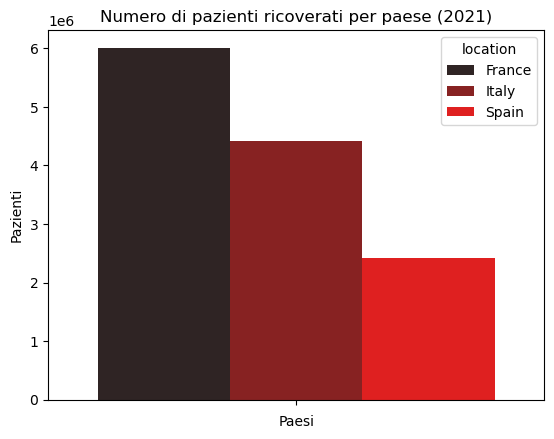

In [197]:
sns.barplot(data = df_grafico_hosp_1,  y = "hosp_patients", hue = "location", palette = "dark:Red")
plt.title("Numero di pazienti ricoverati per paese (2021)")
plt.xlabel("Paesi")                     
plt.ylabel("Pazienti")
plt.show()

Tra i tre paesi analizzati, si osserva che l'Italia ha registrato poco più della media dei ricoveri da COVID, nonostante dal grafico si veda una differenza pressapoco minore, in realtà la Francia ha registrato 1.588.767 casi in più. La Spagna rimane all'ultimo posto per pazienti ospedalizzati, con circa la metà dei ricoveri dell'Italia.